Researching the impact of amount of dimensions for a certain epsilon.
Instead of having a linechart with the epsilons on the x-axis, we will show the dimensions for the heart dataset and seed dataset.
We do this only for the nd-Laplace algorithm.



In [25]:
from Helpers import helpers, UtilityPlotter
# we select epsilon 3.0 for now
epsilon = 3
plain_df, perturbed_df = helpers.load_plain_and_perturbed_dataset(epsilon, perturbed_path='../ExperimentRunners/data/nd-laplace-truncated/heart-dataset/', import_path='../data/heart-dataset/heart_numerical.csv')
plain_df.head()


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,class
0,120.0,0.0,0.0,0.0,0.0,64.0,62.0,126.0,2.0,1.0
1,132.0,4.0,0.0,4.0,2.0,130.0,68.0,198.0,6.0,0.0
2,133.0,2.0,0.0,5.0,2.0,130.0,68.0,198.0,5.0,0.0
3,134.0,2.0,0.0,6.0,2.0,117.0,53.0,170.0,11.0,0.0
4,132.0,4.0,0.0,5.0,0.0,117.0,53.0,170.0,9.0,0.0


In [26]:
from sklearn.cluster import DBSCAN, KMeans, OPTICS

models = [KMeans(n_clusters=4, init="random", algorithm="lloyd")]

In [27]:
import numpy as np
import pandas as pd 


def run_for_dimensions_and_algorithms(X: pd.DataFrame, epsilon, model, perturbing_mechanisms, n_times = 10, import_path='../data/heart-dataset/heart_numerical.csv'):
    column_size = X.shape[1]
    dataframe = pd.DataFrame();
    for algorithm in perturbing_mechanisms:
        print('Running for algorithm ' + algorithm)
        perturbed_path = '../ExperimentRunners/data/' + algorithm + '/heart-dataset/'
        data = run_for_dimensions(epsilon, column_size, model, n_times, algorithm, import_path, perturbed_path)
        dataframe = pd.concat([dataframe, data], ignore_index=True)
    return dataframe

def run_for_dimensions(epsilon, max_columns, models, n_times = 10, model_name = None, import_path='./', perturbed_path='../ExperimentRunners/data/nd-laplace-truncated/heart-dataset/'):
    dataframe = {'type': [], 'dimensions': [], 'ari': [], 'ami': [], 'ch': [], 'sc': []}

    for col in range(1, max_columns):
        print('Adding one column each time...')
        data = perturbed_df.iloc[:,0:col]
        columns = data.columns
        print(data.shape)

        for model in models:
            algorithmName = model_name if model_name is not None else helpers.map_models_to_name(model)
            dataframe['type'].append(algorithmName)
            dataframe['dimensions'].append(col)
            ami_list = []
            ari_list = []
            ch_list = []
            sc_list = []
            for i in range(n_times):
                ami, ari, ch, sc = helpers.measure_external_validity_report(epsilon, model, import_path=import_path, perturbed_path=perturbed_path, columns=columns)
                ami_list.append(ami)
                ari_list.append(ari)
                ch_list.append(ch)
                sc_list.append(sc)
            ami = np.sum(ami_list) / n_times
            ari = np.sum(ari_list) / n_times
            sc = np.sum(sc_list) / n_times
            dataframe['ami'].append(ami)
            dataframe['ari'].append(ari)
            dataframe['ch'].append(np.sum(ch_list) / n_times)
            dataframe['sc'].append(np.sum(sc_list) / n_times)
    return pd.DataFrame(dataframe)

In [28]:
dataframe = run_for_dimensions_and_algorithms(plain_df, epsilon, models, ['nd-laplace-truncated', 'nd-laplace', 'nd-piecewise'], n_times=10)

Running for algorithm nd-laplace-truncated
Adding one column each time...
(2126, 1)
Adding one column each time...
(2126, 2)
Adding one column each time...
(2126, 3)
Adding one column each time...
(2126, 4)
Adding one column each time...
(2126, 5)
Adding one column each time...
(2126, 6)
Adding one column each time...
(2126, 7)
Adding one column each time...
(2126, 8)
Adding one column each time...
(2126, 9)
Running for algorithm nd-laplace
Adding one column each time...
(2126, 1)
Adding one column each time...
(2126, 2)
Adding one column each time...
(2126, 3)
Adding one column each time...
(2126, 4)
Adding one column each time...
(2126, 5)
Adding one column each time...
(2126, 6)


In [ ]:
dataframe.head()

,type,columns,ari,ami,ch,sc
0,nd-laplace-truncated,1,0.792561,0.790770,5599.505483,0.521018
1,nd-laplace-truncated,2,0.832195,0.787863,1768.406933,0.371050
2,nd-laplace-truncated,3,0.847213,0.792699,1526.116032,0.411541
3,nd-laplace-truncated,4,0.860022,0.793800,802.375073,0.285113
4,nd-laplace-truncated,5,0.418991,0.472583,626.606352,0.285622


<AxesSubplot:xlabel='dimensions', ylabel='ari'>

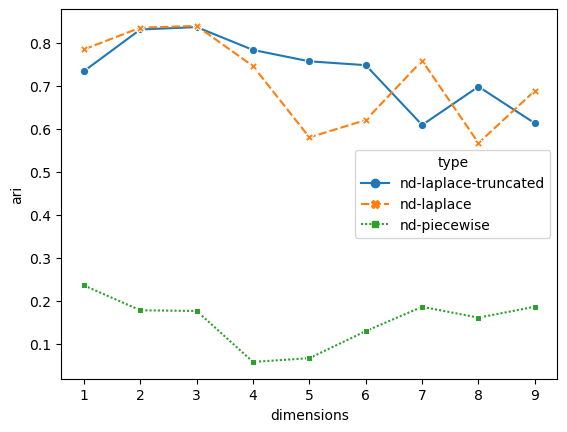

In [ ]:
import seaborn as sns
sns.lineplot(x='dimensions', y='ari', data=dataframe, style='type', hue='type', markers=True, legend=True)